In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [100]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [4]:
df.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [5]:
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [6]:
df = df.drop('ID', axis=1)

In [7]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [8]:
df.tail(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
208,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [9]:
df.shape

(213, 10)

In [10]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [11]:
df.value_counts()

RI       Na     Mg    Al    Si     K     Ca     Ba    Fe    Type of glass
1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.00  0.00  1                2
1.51115  17.38  0.00  0.34  75.41  0.00  6.65   0.00  0.00  6                1
1.51847  13.10  3.97  1.19  72.44  0.60  8.43   0.00  0.00  2                1
1.51829  14.46  2.24  1.62  72.38  0.00  9.26   0.00  0.00  6                1
1.51831  14.39  0.00  1.82  72.86  1.41  6.47   2.88  0.00  7                1
                                                                            ..
1.51694  12.86  3.58  1.31  72.61  0.61  8.79   0.00  0.00  3                1
1.51707  13.48  3.48  1.71  72.52  0.62  7.99   0.00  0.00  2                1
1.51708  13.72  3.68  1.81  72.06  0.64  7.88   0.00  0.00  2                1
1.51709  13.00  3.47  1.79  72.72  0.66  8.18   0.00  0.00  2                1
1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24  2                1
Length: 212, dtype: int64

In [12]:
df.nunique()

RI               177
Na               142
Mg                93
Al               117
Si               132
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [14]:
df.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [15]:
df['RI'].value_counts()

1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 177, dtype: int64

In [16]:
df['Na'].value_counts()

13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64

In [17]:
df['Mg'].value_counts()

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: Mg, Length: 93, dtype: int64

In [18]:
df['Al'].value_counts()

1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: Al, Length: 117, dtype: int64

In [19]:
df['Si'].value_counts()

72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: Si, Length: 132, dtype: int64

In [20]:
df.mean()

RI                1.518353
Na               13.406761
Mg                2.676056
Al                1.446526
Si               72.655023
K                 0.499108
Ca                8.957934
Ba                0.175869
Fe                0.057277
Type of glass     2.788732
dtype: float64

In [21]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

<Axes: >

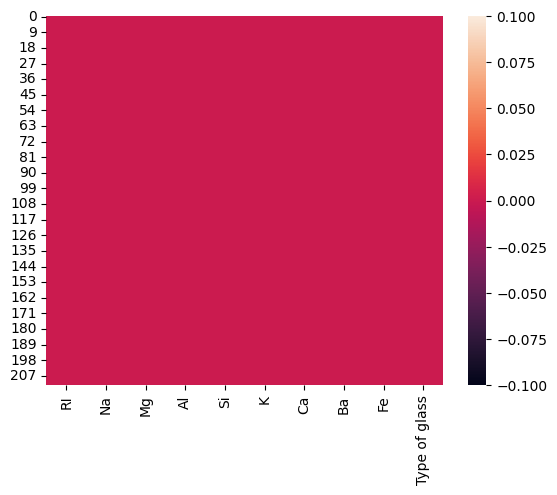

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [24]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
Type of glass,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


<Axes: >

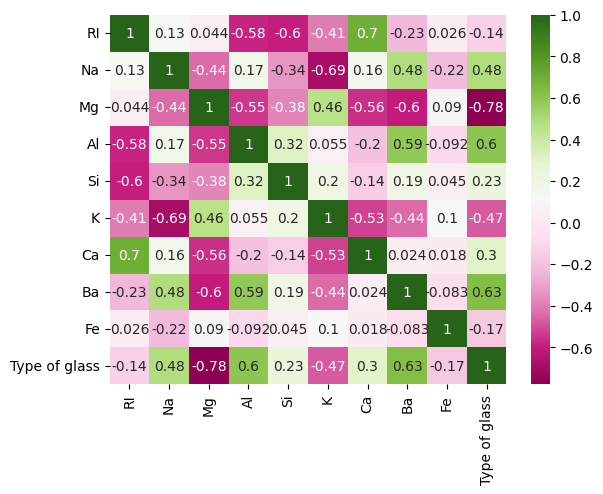

In [63]:
sns.heatmap(df.corr(),cmap="PiYG",annot=True)

In [38]:
df.skew()

RI               0.962798
Na               0.729253
Mg              -1.981645
Al               0.620774
Si              -0.336436
K               -0.696588
Ca               1.373982
Ba               3.373998
Fe               1.379811
Type of glass    1.681930
dtype: float64

<Axes: xlabel='RI', ylabel='Count'>

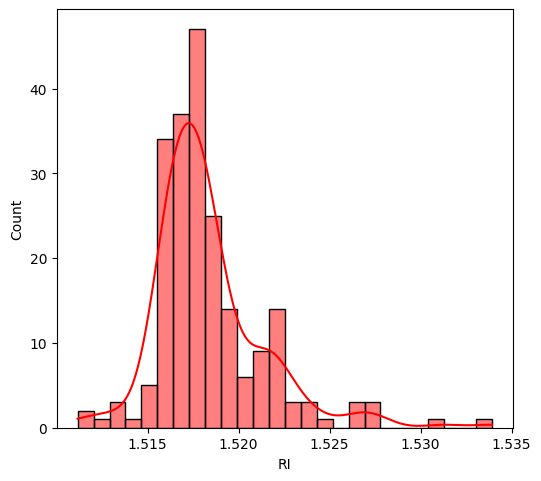

In [26]:
plt.figure(figsize=(20,25))
plt.subplot(4,3,1)
sns.histplot(df['RI'], color = 'red', kde = True)

<Axes: xlabel='Na', ylabel='Count'>

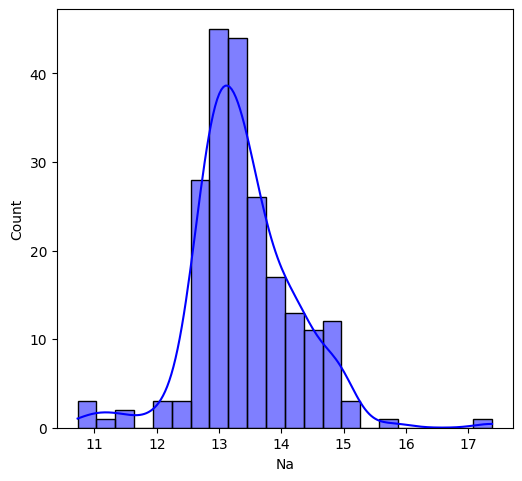

In [27]:
plt.figure(figsize=(20,25))
plt.subplot(4,3,2)
sns.histplot(df['Na'], color = 'blue', kde = True)

<Axes: xlabel='Mg', ylabel='Count'>

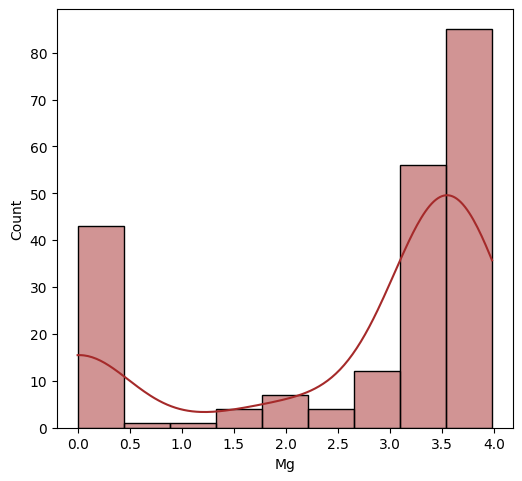

In [28]:
plt.figure(figsize=(20,25))
plt.subplot(4,3,3)
sns.histplot(df['Mg'], kde = True, color = 'brown')

<Axes: xlabel='Si', ylabel='Count'>

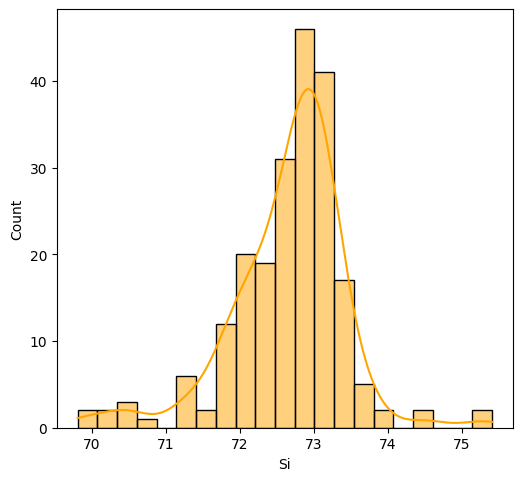

In [29]:
plt.figure(figsize=(20,25))
plt.subplot(4,3,1)
sns.histplot(df['Si'], color = 'orange', kde = True)

<Axes: xlabel='Al', ylabel='Count'>

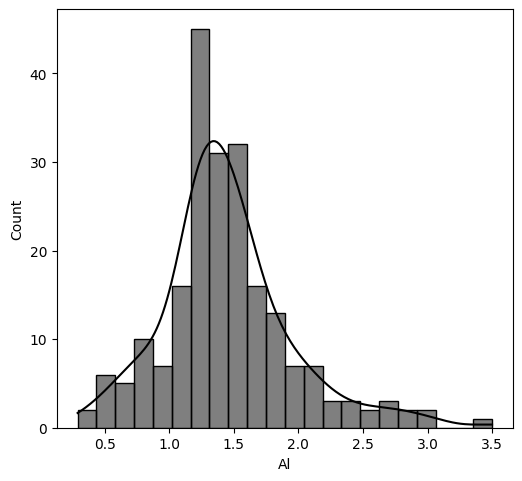

In [30]:
plt.figure(figsize=(20,25))
plt.subplot(4,3,4)
sns.histplot(df['Al'], kde = True, color = 'black')

<Axes: xlabel='K', ylabel='Count'>

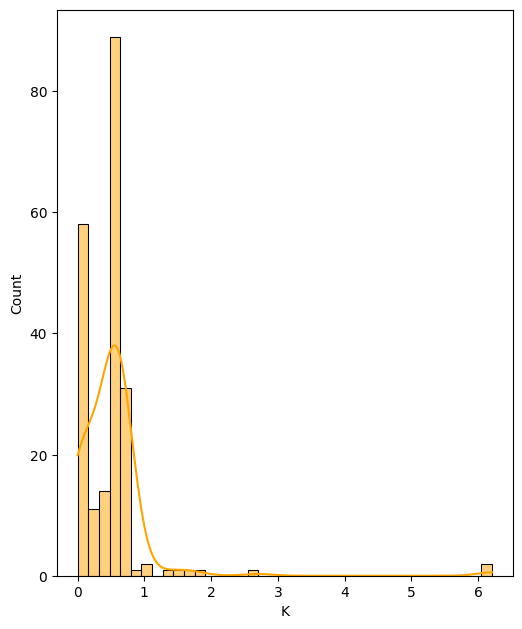

In [31]:
plt.figure(figsize=(20,25))
plt.subplot(3,3,6)
sns.histplot(df['K'], kde = True, color = 'orange')

<Axes: xlabel='Ca', ylabel='Count'>

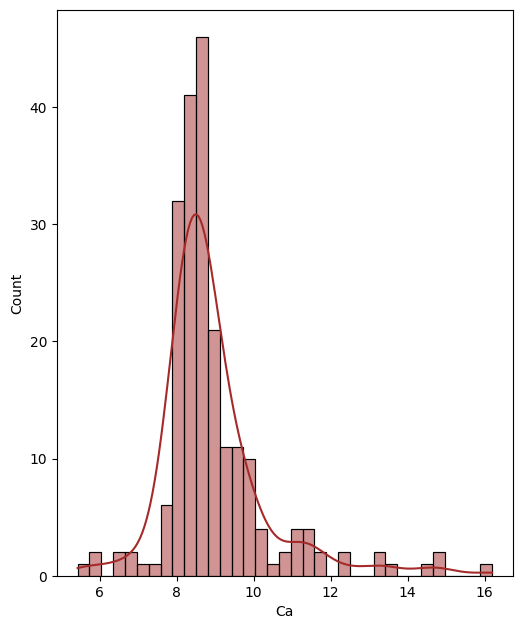

In [32]:
plt.figure(figsize=(20,25))
plt.subplot(3,3,7)
sns.histplot(df['Ca'], kde = True, color = 'brown')

<Axes: ylabel='Count'>

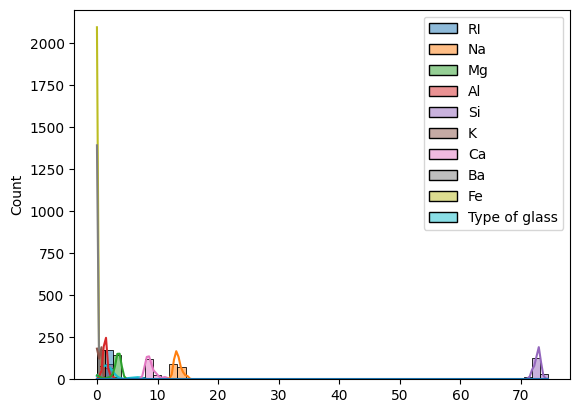

In [66]:
sns.histplot(data=df, kde=True)

<Axes: >

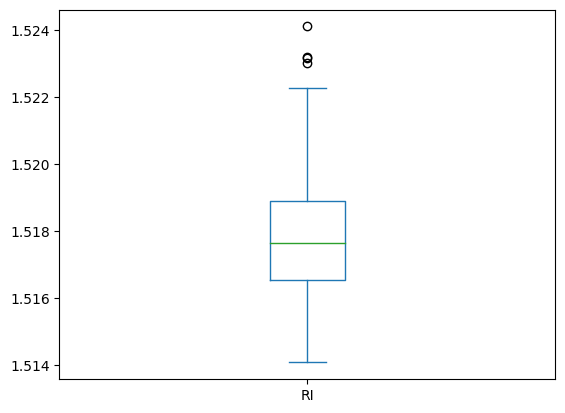

In [46]:
df['RI'].plot.box()

<Axes: >

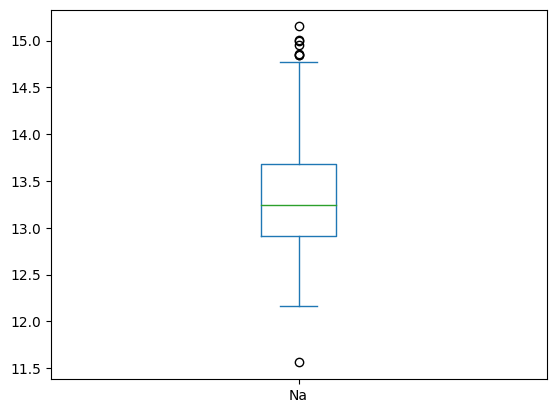

In [47]:
df['Na'].plot.box()

<Axes: >

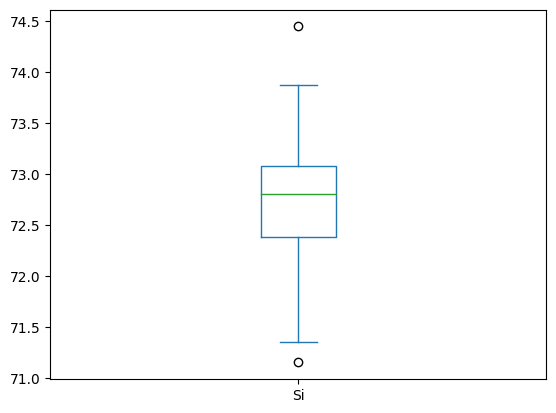

In [48]:
df['Si'].plot.box()

<Axes: >

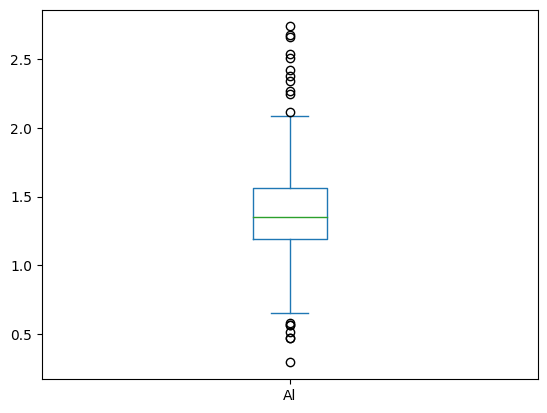

In [49]:
df['Al'].plot.box()

<Axes: >

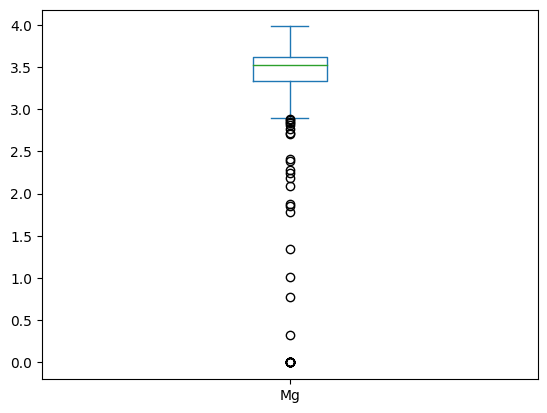

In [50]:
df['Mg'].plot.box()

<Axes: >

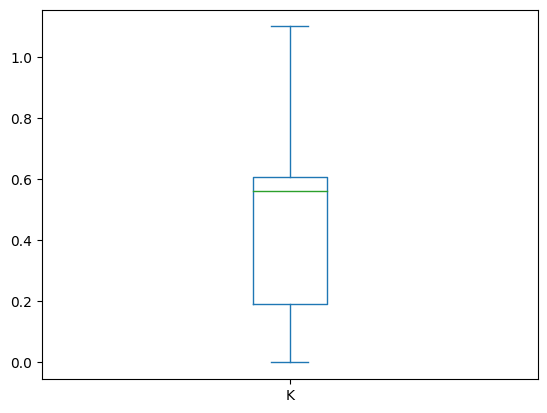

In [51]:
df['K'].plot.box()

<Axes: >

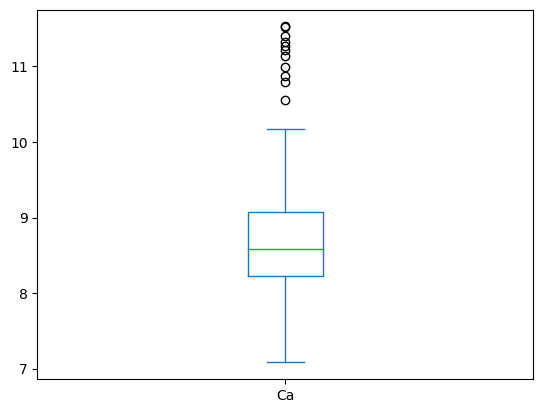

In [52]:
df['Ca'].plot.box()

RI                  Axes(0.125,0.53;0.110714x0.35)
Na               Axes(0.257857,0.53;0.110714x0.35)
Mg               Axes(0.390714,0.53;0.110714x0.35)
Al               Axes(0.523571,0.53;0.110714x0.35)
Si               Axes(0.656429,0.53;0.110714x0.35)
K                Axes(0.789286,0.53;0.110714x0.35)
Ca                  Axes(0.125,0.11;0.110714x0.35)
Ba               Axes(0.257857,0.11;0.110714x0.35)
Fe               Axes(0.390714,0.11;0.110714x0.35)
Type of glass    Axes(0.523571,0.11;0.110714x0.35)
dtype: object

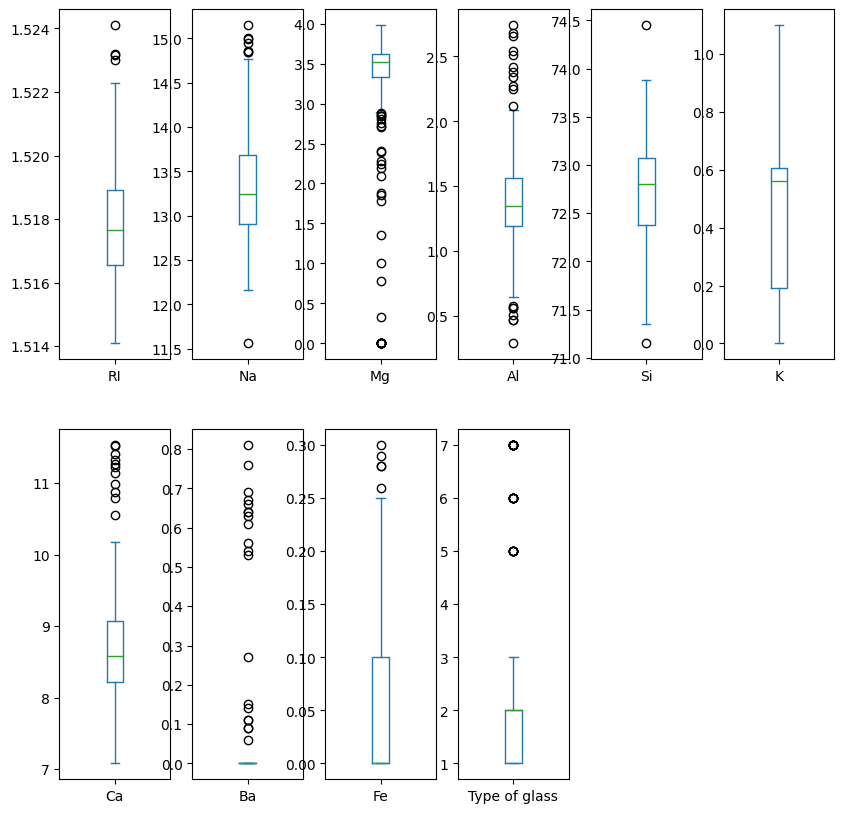

In [53]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

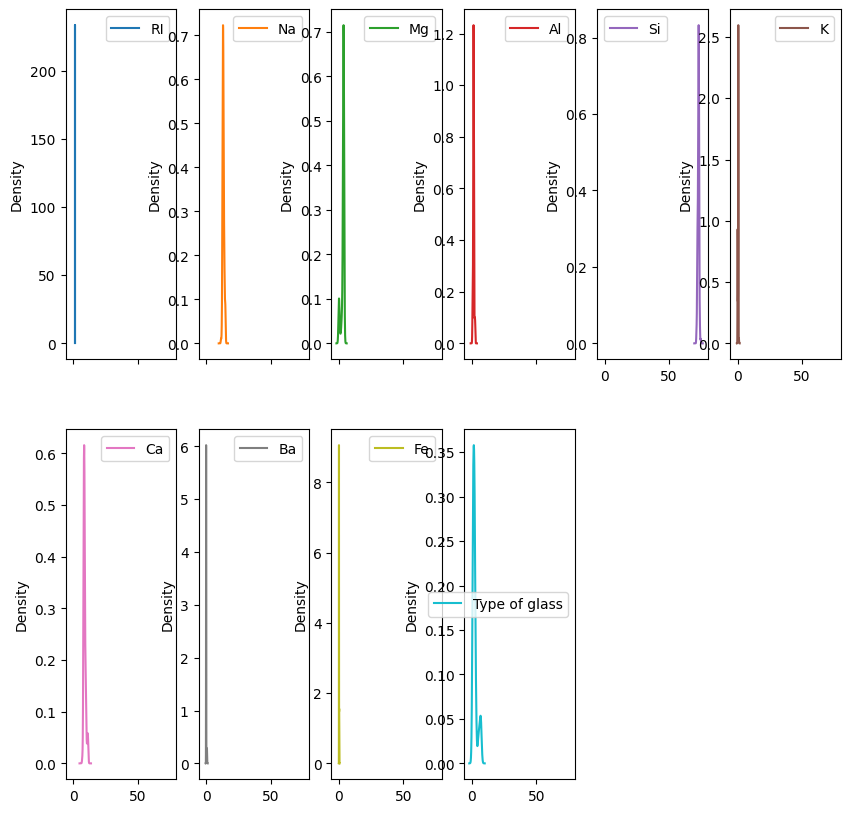

In [54]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(10,10))

In [35]:
from scipy import stats
z = abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,0.191475,0.704498,0.558738,0.145324,0.007760,0.165576,1.005952,0.347296,0.605187,0.802557
1,0.819092,0.169658,0.520382,0.260836,0.455342,0.154697,1.056501,0.347296,0.605187,0.802557
2,0.169531,0.305754,0.627781,0.303276,0.198816,0.485849,0.611669,0.347296,0.605187,0.802557
3,0.274865,0.216615,0.574081,0.416098,0.610275,0.414677,0.763316,0.347296,0.605187,0.802557
4,0.915648,0.929734,0.566410,0.441351,0.420913,0.734950,0.763316,0.347296,2.428607,0.802557
...,...,...,...,...,...,...,...,...,...,...
207,0.722535,1.417617,2.202957,2.968571,0.214336,1.542547,0.631836,1.165248,0.605187,2.157192
208,0.797147,1.075914,2.202957,3.284473,0.198816,1.257860,0.358872,2.621773,0.605187,2.157192
209,0.525034,2.234732,2.202957,1.276236,0.575845,1.542547,0.429693,4.106307,0.605187,2.157192
210,1.142758,1.402760,2.202957,1.343930,1.195574,1.542547,0.389254,4.246358,0.605187,2.157192


In [36]:
threshold=3
print(np.where(z>3))

(array([ 46,  55,  70, 102, 102, 155, 159, 160, 166, 170, 170, 171, 171,
       171, 175, 176, 177, 186, 187, 189, 190, 191, 192], dtype=int64), array([0, 8, 8, 0, 4, 1, 6, 6, 4, 5, 6, 5, 6, 7, 3, 7, 7, 7, 7, 3, 7, 7,
       7], dtype=int64))


In [37]:
df1=df[(z<3).all(axis=1)]
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
198,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,7
199,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.00,7
201,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.00,7
203,1.51617,14.95,0.00,2.27,73.30,0.00,8.71,0.67,0.00,7


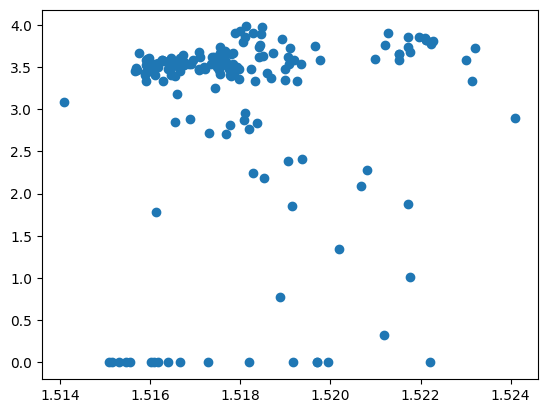

In [55]:
plt.scatter(df['RI'],df['Mg'])

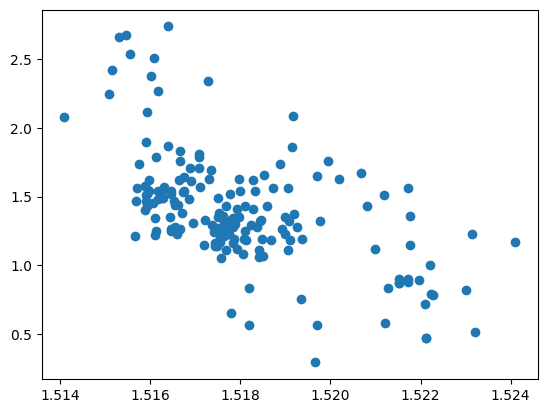

In [56]:
plt.scatter(df['RI'],df['Al'])

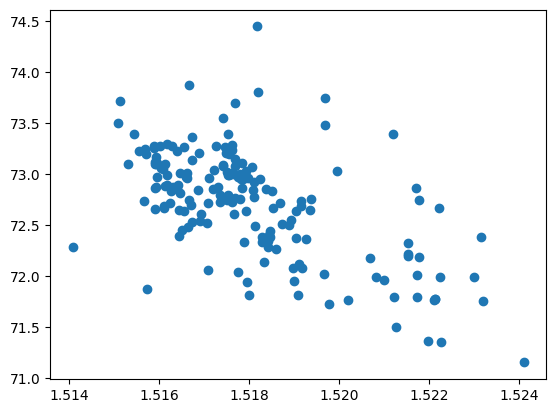

In [57]:
plt.scatter(df['RI'],df['Si'])

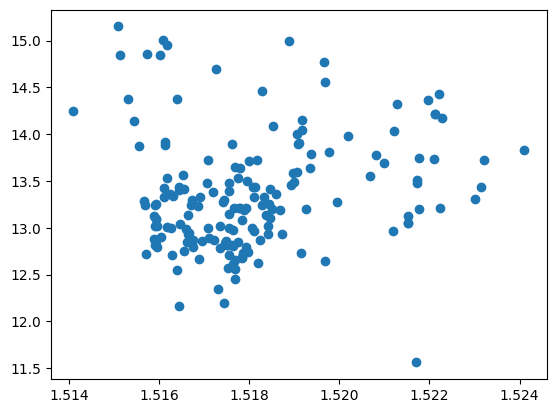

In [58]:
plt.scatter(df['RI'],df['Na'])

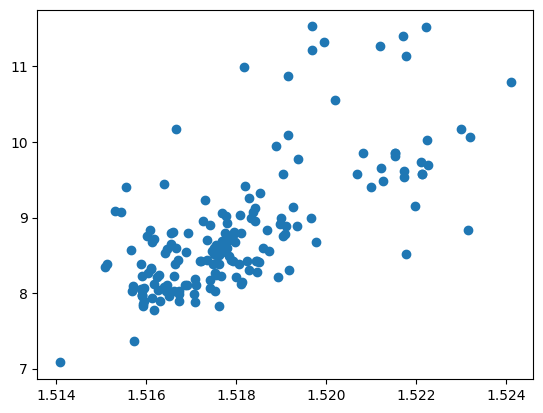

In [59]:
plt.scatter(df['RI'],df['Ca'])

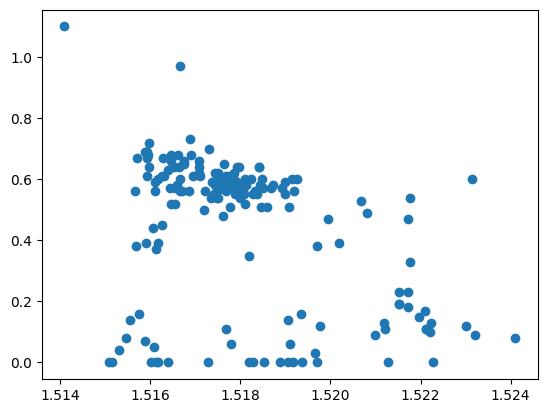

In [60]:
plt.scatter(df['RI'],df['K'])

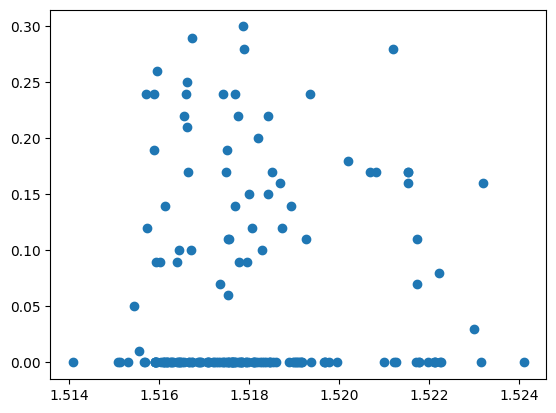

In [62]:
plt.scatter(df['RI'],df['Fe'])

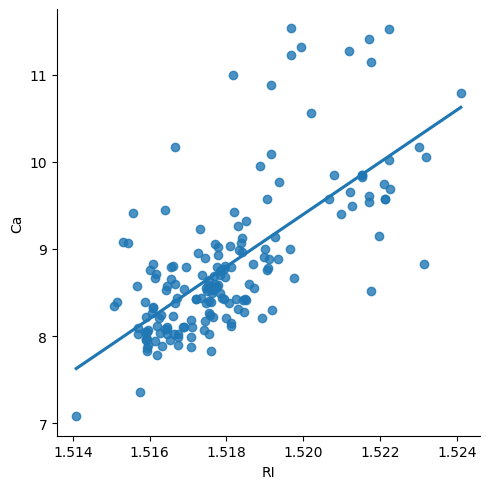

In [64]:
sns.lmplot(x = "RI",
            y = "Ca", 
            ci = None,
            data = df)

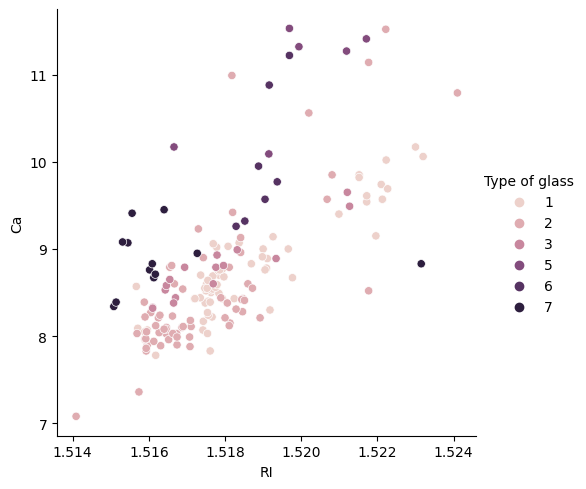

In [65]:
sns.relplot(x ="RI", y ="Ca", 
            hue ="Type of glass", data = df);

<Axes: xlabel='RI', ylabel='Ca'>

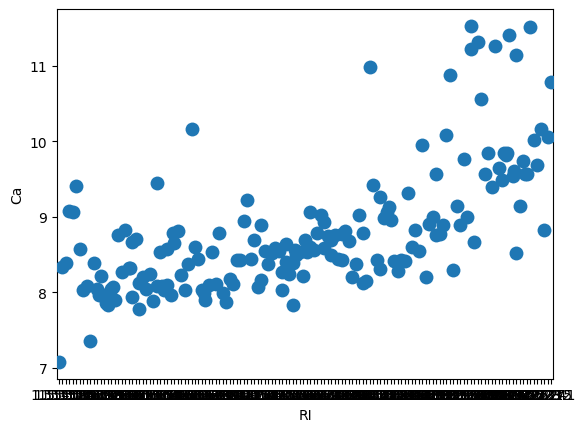

In [68]:
sns.swarmplot(x ="RI", y = "Ca", 
              data = df, size = 10)

Text(0.5, 1.0, 'RI vs K')

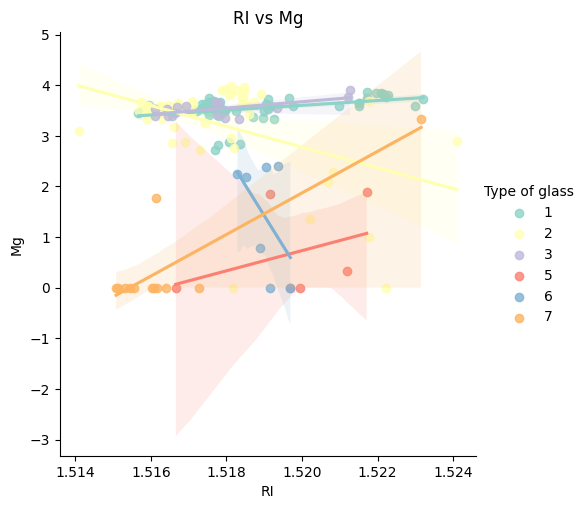

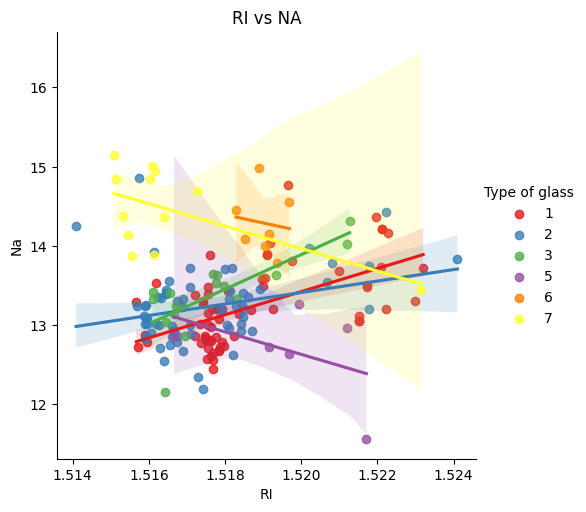

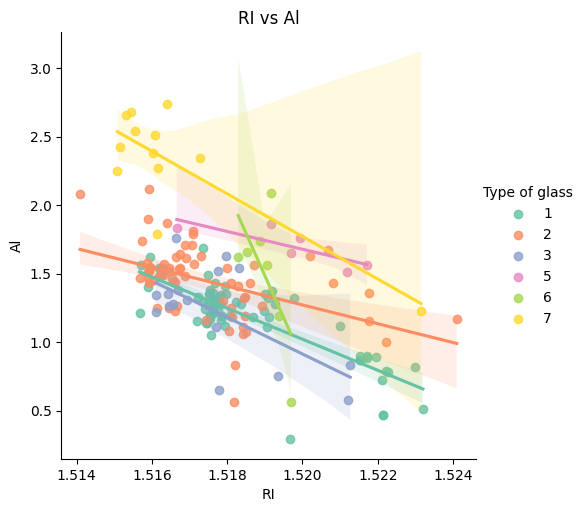

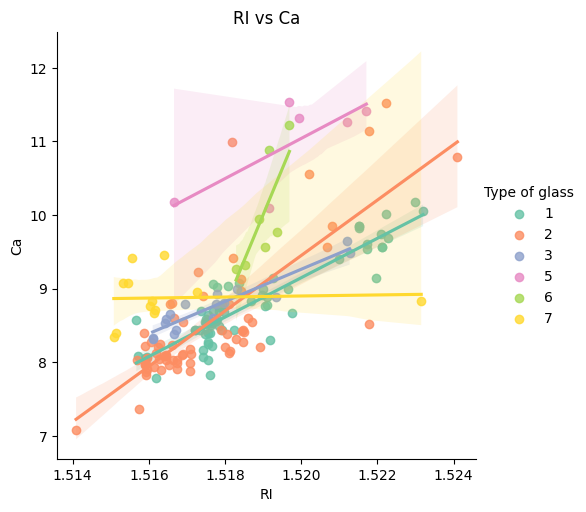

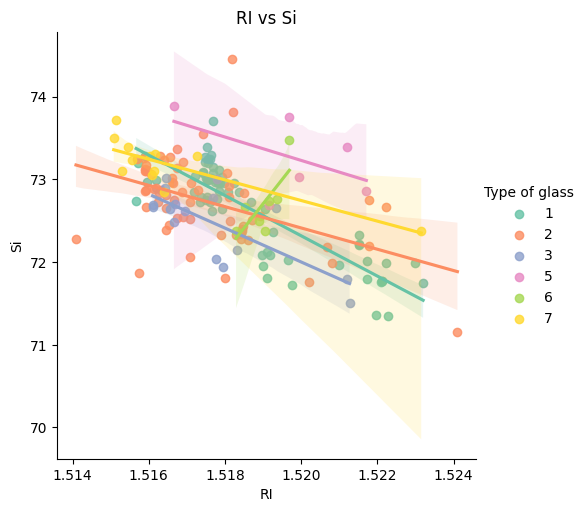

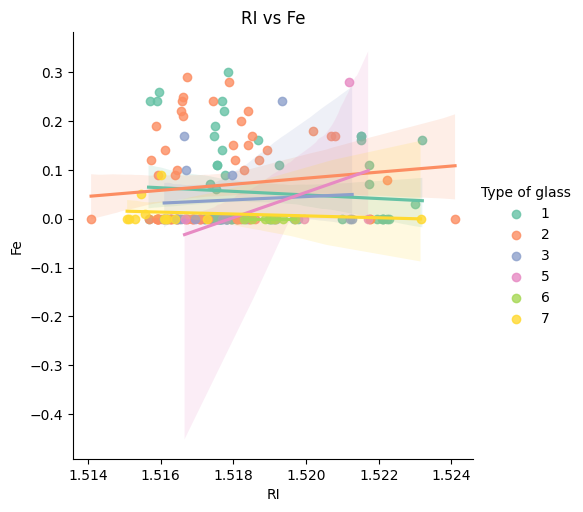

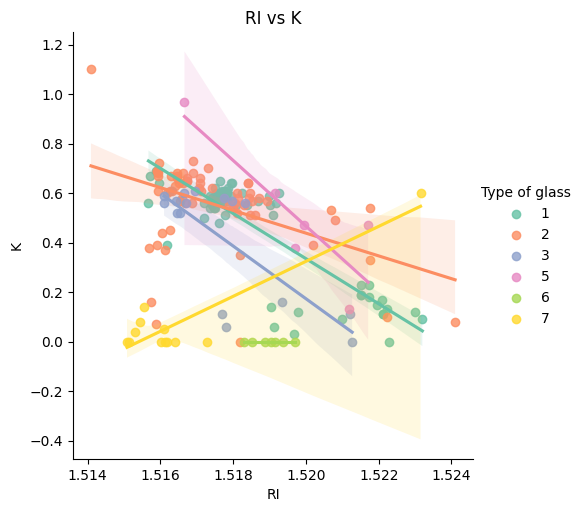

In [74]:
ax = sns.lmplot(x = 'RI', y = 'Mg', data = df, hue = 'Type of glass', palette = 'Set3')
plt.title('RI vs Mg')

ax = sns.lmplot(x = 'RI', y = 'Na', data = df, hue = 'Type of glass', palette = 'Set1')
plt.title('RI vs NA')

ax = sns.lmplot(x = 'RI', y = 'Al', data = df, hue = 'Type of glass', palette = 'Set2')
plt.title('RI vs Al')

ax = sns.lmplot(x = 'RI', y = 'Ca', data = df, hue = 'Type of glass', palette = 'Set2')
plt.title('RI vs Ca')

ax = sns.lmplot(x = 'RI', y = 'Si', data = df, hue = 'Type of glass', palette = 'Set2')
plt.title('RI vs Si')

ax = sns.lmplot(x = 'RI', y = 'Fe', data = df, hue = 'Type of glass', palette = 'Set2')
plt.title('RI vs Fe')

ax = sns.lmplot(x = 'RI', y = 'K', data = df, hue = 'Type of glass', palette = 'Set2')
plt.title('RI vs K')

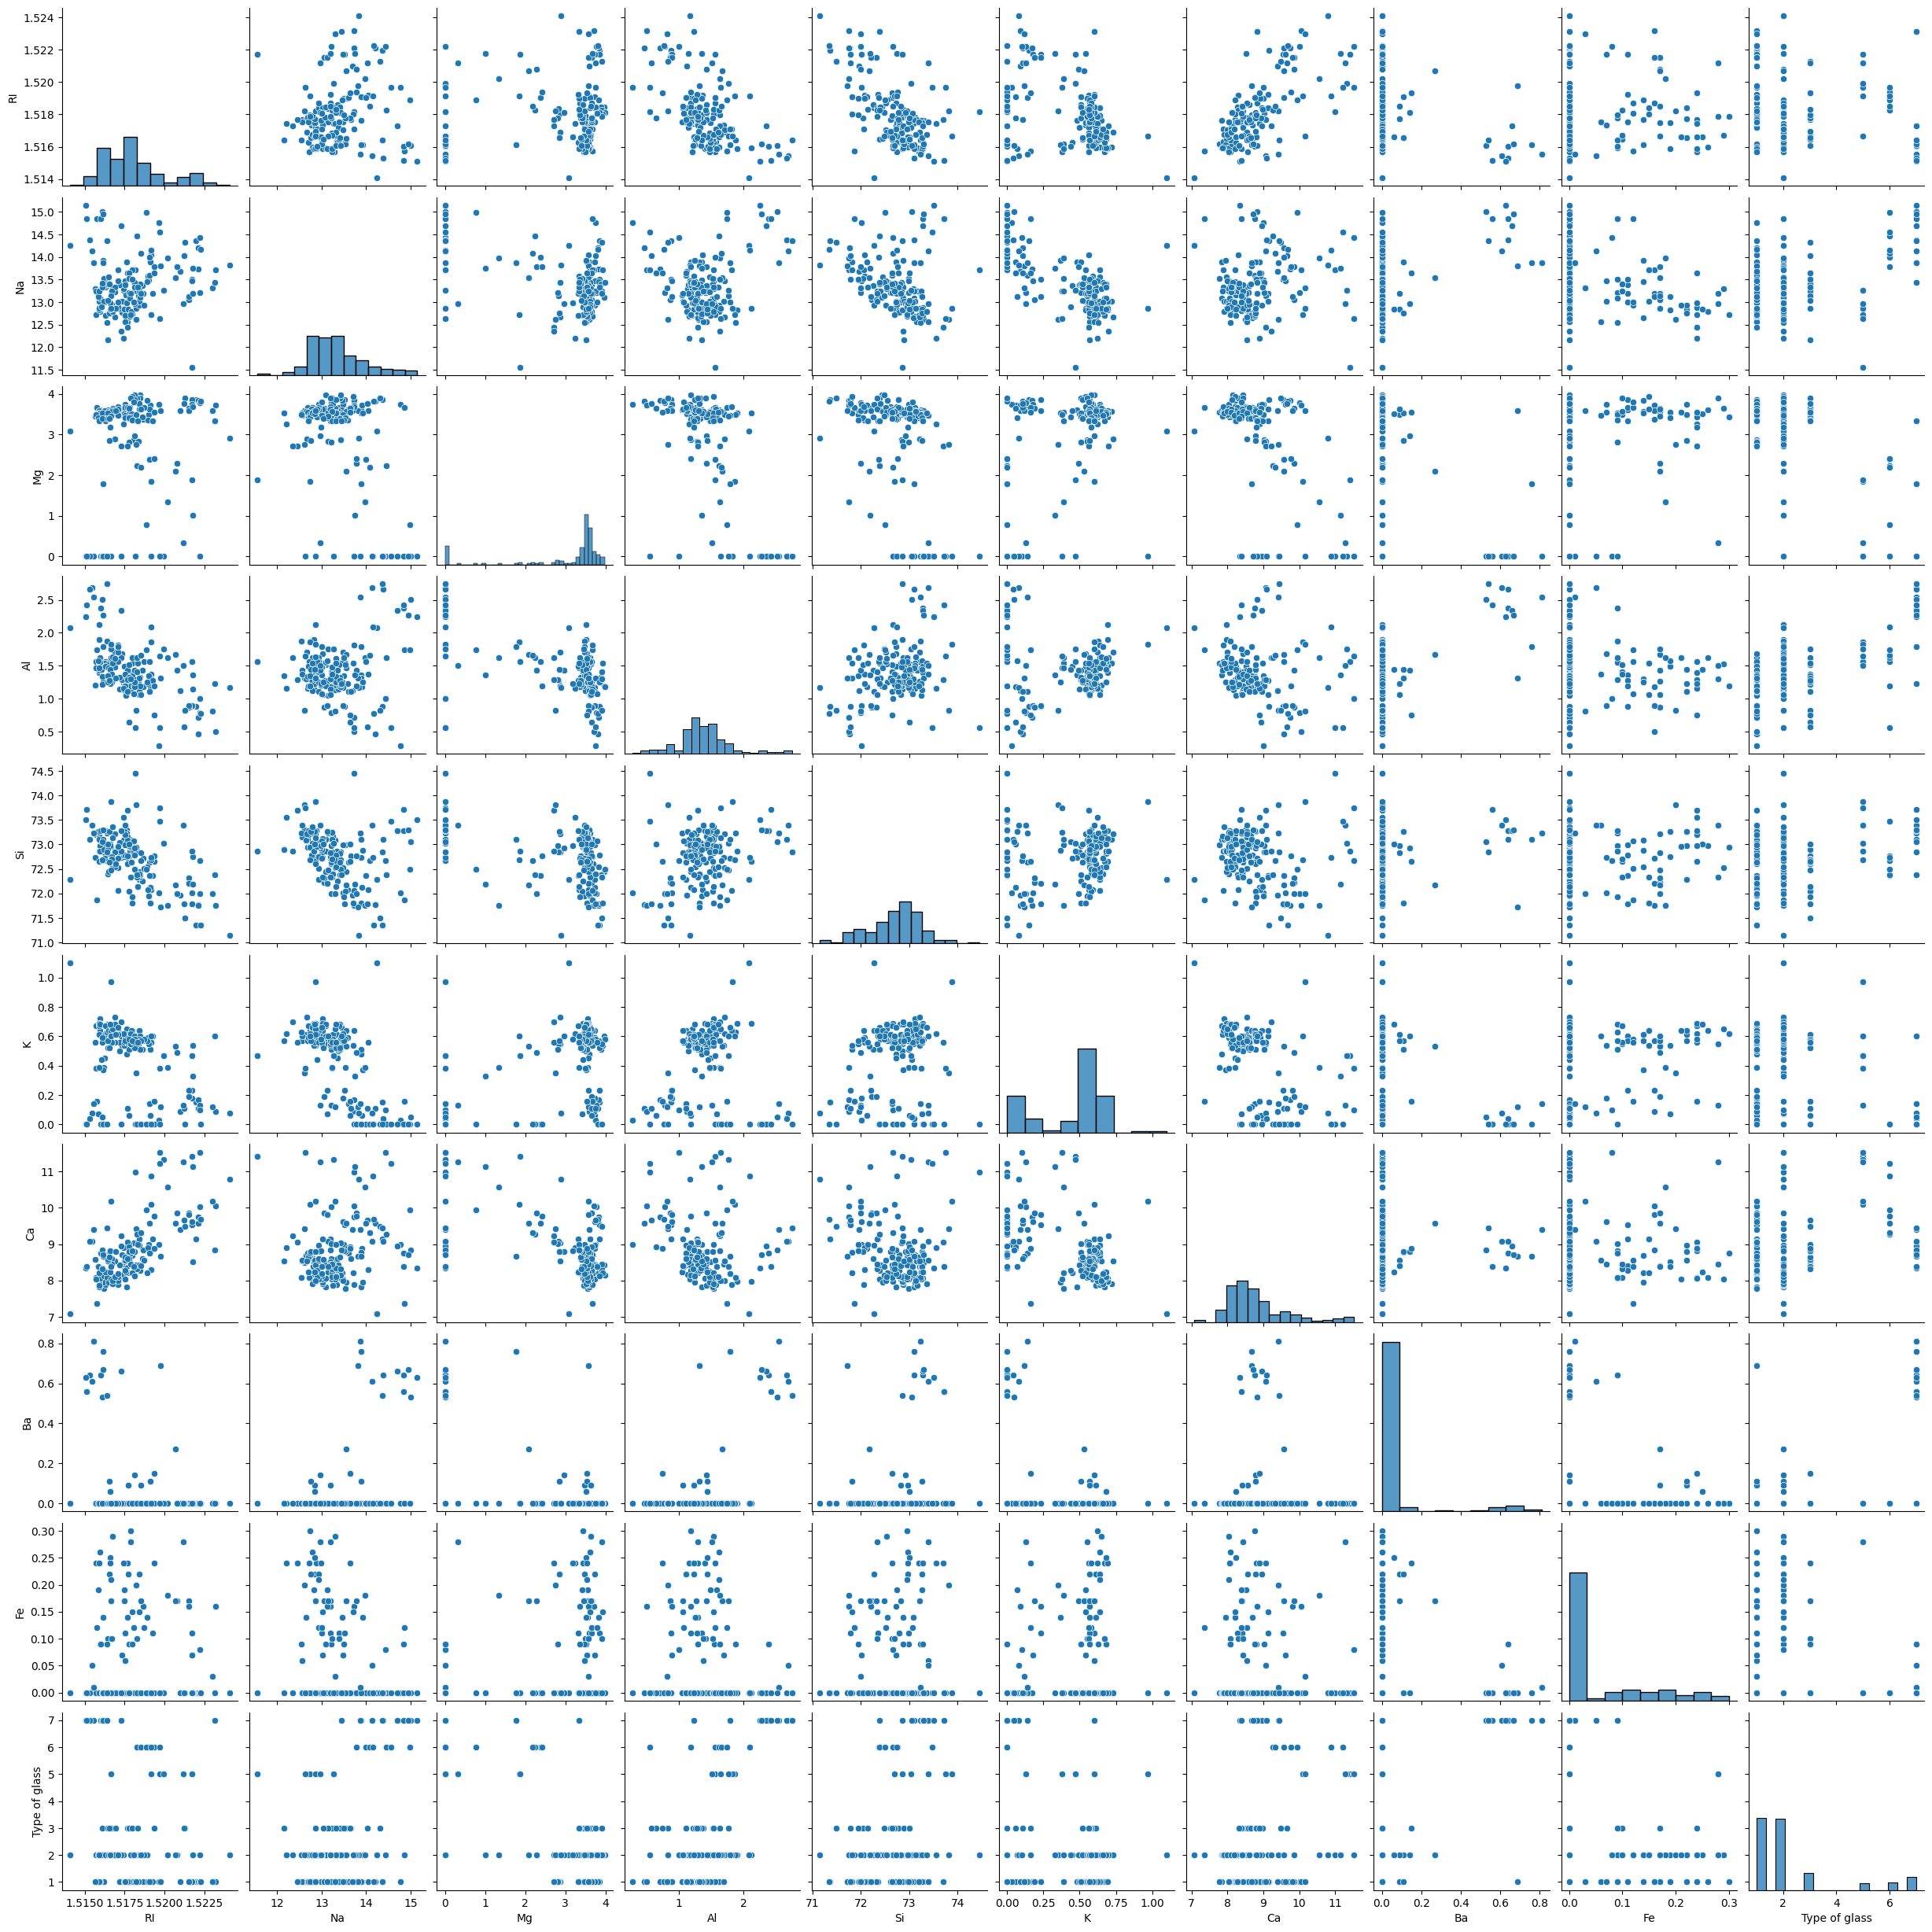

In [76]:
sns.pairplot(df)

In [81]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type of glass']

X = df[features]

y = df[label]

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [83]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26


In [85]:
y.head()

,Type of glass
0,1
1,1
2,1
3,1
4,1


In [86]:
from sklearn import preprocessing
X=preprocessing.scale(X)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=50)

In [155]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7727272727272727
[[13  0  2  0  0  0]
 [ 2 14  0  1  0  0]
 [ 2  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.72      0.87      0.79        15
           2       0.88      0.82      0.85        17
           3       0.00      0.00      0.00         4
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         1
           7       1.00      0.83      0.91         6

    accuracy                           0.77        44
   macro avg       0.68      0.75      0.70        44
weighted avg       0.75      0.77      0.76        44



In [156]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predRFC = RFC.predict(X_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8863636363636364
[[14  0  1  0  0  0]
 [ 1 16  0  0  0  0]
 [ 1  1  2  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.82      0.93      0.87        15
           2       0.94      0.94      0.94        17
           3       0.67      0.50      0.57         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.83      0.91         6

    accuracy                           0.89        44
   macro avg       0.91      0.87      0.88        44
weighted avg       0.89      0.89      0.88        44



In [157]:
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)
predGB= GB.predict(X_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.75
[[12  2  1  0  0  0]
 [ 4 13  0  0  0  0]
 [ 1  1  2  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.63      0.80      0.71        15
           2       0.81      0.76      0.79        17
           3       0.67      0.50      0.57         4
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      0.83      0.91         6

    accuracy                           0.75        44
   macro avg       0.69      0.65      0.66        44
weighted avg       0.75      0.75      0.74        44



In [158]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(X_train,y_train)
predABC= ABC.predict(X_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.6590909090909091
[[14  1  0  0  0  0]
 [ 7 10  0  0  0  0]
 [ 2  2  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 1  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.54      0.93      0.68        15
           2       0.77      0.59      0.67        17
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       1.00      0.83      0.91         6

    accuracy                           0.66        44
   macro avg       0.38      0.39      0.38        44
weighted avg       0.62      0.66      0.61        44



In [159]:
BC = ExtraTreesClassifier()
BC.fit(X_train,y_train)
predBC= ABC.predict(X_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.6590909090909091
[[14  1  0  0  0  0]
 [ 7 10  0  0  0  0]
 [ 2  2  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 1  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.54      0.93      0.68        15
           2       0.77      0.59      0.67        17
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       1.00      0.83      0.91         6

    accuracy                           0.66        44
   macro avg       0.38      0.39      0.38        44
weighted avg       0.62      0.66      0.61        44



In [160]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.6590909090909091
[[14  1  0  0  0  0]
 [ 7 10  0  0  0  0]
 [ 2  2  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 1  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.54      0.93      0.68        15
           2       0.77      0.59      0.67        17
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       1.00      0.83      0.91         6

    accuracy                           0.66        44
   macro avg       0.38      0.39      0.38        44
weighted avg       0.62      0.66      0.61        44

